In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import pandas as pd

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

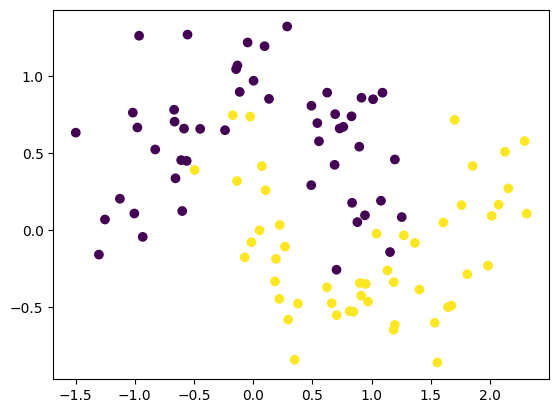

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [5]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.get_weights()

[array([[ 0.6832314 , -1.6735564 ,  1.0477873 ,  1.6213351 , -1.2596024 ,
         -1.696271  , -0.33874512,  0.2793343 ,  1.1598883 , -1.9368675 ],
        [ 0.99077505, -0.41561097,  0.1907975 ,  0.05299483, -1.0477676 ,
         -2.085464  ,  1.9401085 ,  1.3249755 , -1.2050905 ,  0.07037228]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.8092361 , -0.21071796, -0.6431569 , -0.368388  , -0.33481008,
         -0.55257446, -0.24442178, -0.03759275, -0.1382862 , -0.95429623],
        [ 0.9672991 , -0.38612342, -0.06177898, -0.45717973, -0.56254053,
         -0.36443818, -0.02874428,  0.06235187, -0.05085626, -0.21538468],
        [-0.70070684, -0.21622932, -0.5008503 , -0.71736574, -0.63704854,
         -0.29540208,  0.20084652,  0.5786841 , -0.2506481 ,  0.09642504],
        [ 0.44270846, -0.28969127, -0.05123485, -0.2792574 ,  0.16861872,
         -0.8168719 , -0.5594759 ,  0.02514669,  0.31903088, -0.40115315],
        [-0.09541

In [7]:
initial_weights = model.get_weights()

In [8]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [9]:
model.set_weights(initial_weights)

In [10]:
model.get_weights()

[array([[-1.3244873 , -0.7710762 ,  0.72347397,  0.67694545, -0.17493829,
          0.31792536, -0.79455286, -1.000312  ,  1.2826086 ,  0.32629332],
        [ 1.008475  ,  0.8090017 , -0.29923666,  1.0306282 , -0.12295614,
          0.7861549 ,  0.6027674 ,  0.36770192,  0.65346867,  0.09771977]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.26760638, -0.09104735,  0.17651314,  0.11292841, -0.08887975,
         -0.05941022,  0.08076611,  0.12960005,  0.14172713,  0.4350257 ],
        [-0.18237026, -0.05244104, -0.00335391,  0.58864486,  0.02143274,
         -0.31294456, -0.2696273 ,  0.55915517, -0.30214188,  0.17472573],
        [ 0.40475258, -0.2087052 , -0.12224258,  0.7307704 , -0.14503326,
          0.2759439 , -0.05150764, -0.53103495,  0.05498508,  0.2522001 ],
        [ 0.27092707,  0.24555753, -0.1363183 ,  0.25071335, -0.06198025,
          0.24803185, -0.4609787 , -0.6278859 ,  0.19007072,  0.28193045],
        [-0.00889

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.4602 - loss: 0.6854 - val_accuracy: 0.7500 - val_loss: 0.6692
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5156 - loss: 0.6833 - val_accuracy: 0.6500 - val_loss: 0.6653
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3812 - loss: 0.6824 - val_accuracy: 0.6500 - val_loss: 0.6617
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5813 - loss: 0.6795 - val_accuracy: 0.8500 - val_loss: 0.6576
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6117 - loss: 0.6771 - val_accuracy: 0.8500 - val_loss: 0.6533
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7055 - loss: 0.6752 - val_accuracy: 0.8500 - val_loss: 0.6491
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7445 - loss: 0.6678 - val_accuracy: 0.8500 - val_loss: 0.6444
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6820 - loss: 0.6673 - val_accuracy: 0.8500 - val_loss

In [13]:
model.get_weights()

[array([[-1.5574615 , -0.566353  ,  0.7440542 ,  0.69612193, -0.4228735 ,
          0.19871785, -0.82976794, -1.2471467 ,  1.5684325 ,  0.2595938 ],
        [ 1.0452876 ,  1.11848   , -0.6742242 ,  0.84889543, -0.04453896,
          1.0522442 ,  0.7749847 ,  0.40580234,  0.7425547 ,  0.36789215]],
       dtype=float32),
 array([-0.08282119,  0.21683118, -0.00559229,  0.05553891, -0.04281896,
         0.19171807,  0.19535054, -0.0868867 , -0.12510154,  0.06359529],
       dtype=float32),
 array([[-0.23755221, -0.13443328,  0.2815889 ,  0.22309518, -0.24804978,
         -0.12363591,  0.13718696,  0.24872123,  0.08290153,  0.5376099 ],
        [-0.05763871,  0.18224818,  0.11601786,  0.74491715,  0.00873265,
         -0.68402874, -0.15859729,  0.7035041 , -0.46478963,  0.28849652],
        [ 0.44905502, -0.28347594,  0.19786625,  0.7639787 , -0.0959212 ,
          0.5368167 ,  0.28543118, -0.56998074,  0.14677988,  0.06089706],
        [ 0.2863523 ,  0.39895213, -0.05203439,  0.4718313 , 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

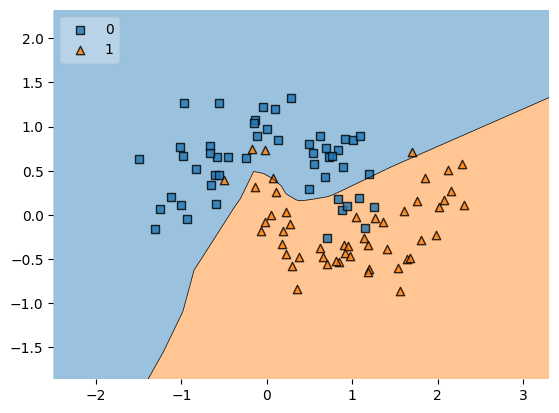

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)